In [221]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od

from bs4 import BeautifulSoup 
import requests   
import time
import csv

import seaborn as sns
import random
from scipy.stats import norm


### Loading Data in from Kaggle API

In [111]:
od.download("https://www.kaggle.com/datasets/cashncarry/fifaworldranking")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  mallomi


Your Kaggle Key:

  ········


100%|██████████| 530k/530k [00:00<00:00, 989kB/s]

### Reading in the Kaggle tables from dataset

In [115]:
fifarankingdata = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifaworldranking/fifa_ranking-2022-10-06.csv')
fifarankings= pd.read_csv(fifarankingdata)

In [119]:
max_date = fifarankings['rank_date'].max()
fifarankings = fifarankings[fifarankings['rank_date'].isin([max_date])]

In [120]:
fifarankings = fifarankings[['rank', 'country_full']]

In [125]:
fifarankings.sort_values('rank',ascending=True)

,rank,country_full
63809,1,Brazil
63838,2,Belgium
63839,3,Argentina
63840,4,France
63841,5,England
...,...,...
63776,207,Sri Lanka
63777,208,US Virgin Islands
63778,209,British Virgin Islands
63837,210,Anguilla


## EA Sports FIFA Ratings

### Loading Data in from Kaggle API

f51999f5f297523ab16349d4112bd4ff

In [2]:
od.download("https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset")

Skipping, found downloaded files in "./fifa-23-players-dataset" (use force=True to force download)


### Reading in the Kaggle tables from dataset

In [130]:
fifa23data = (r'/Users/mallon/Desktop/UCD Data Analytics for Finance/fifa-23-players-dataset/Fifa 23 Players Data.csv')
fifa23= pd.read_csv(fifa23data)

In [131]:
WC_2022_teams = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'United States', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

In [132]:
fifa23 = fifa23[fifa23["Nationality"].isin(WC_2022_teams)]

In [133]:
# A Quick Look into the Dataset
fifa23.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [134]:
fifa23.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,11611.000000,11611.000000,1.161100e+04,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,1.161100e+04,...,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000,11611.000000
mean,66.482818,71.760830,3.369115e+06,25.121264,181.653777,75.260357,1613.349668,360.602532,10285.642925,6.009883e+06,...,58.936353,57.942727,58.936353,56.767720,56.490483,56.767720,56.117992,55.029024,56.117992,23.458272
std,6.787251,6.111206,8.595532e+06,4.708627,6.900113,7.109443,275.079052,39.480342,21859.380220,1.663026e+07,...,14.125188,13.341080,14.125188,14.089802,14.085287,14.089802,14.352551,14.972289,14.352551,15.319088
min,48.000000,53.000000,0.000000e+00,16.000000,155.000000,54.000000,777.000000,249.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,12.000000
25%,62.000000,67.000000,5.250000e+05,21.000000,177.000000,70.000000,1480.000000,333.000000,1000.000000,7.290000e+05,...,54.000000,53.000000,54.000000,51.000000,49.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.100000e+06,25.000000,182.000000,75.000000,1652.000000,360.000000,3000.000000,1.600000e+06,...,62.000000,60.000000,62.000000,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,18.000000
75%,71.000000,76.000000,2.300000e+06,28.000000,187.000000,80.000000,1797.000000,387.000000,9000.000000,3.800000e+06,...,68.000000,67.000000,68.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,20.000000
max,91.000000,95.000000,1.905000e+08,42.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [135]:
## Setting Each Player into a Fixed Position
fifa23["Position"] = np.where(
    fifa23["Best Position"].str.contains(r"^(GK|CB|RB|LB|CB|RWB|LWB)$"), "Defender",
    np.where(
        fifa23["Best Position"].str.contains(r"^(CM|RM|CAM|CDM|LM)$"), "Midfield",
    np.where(
        fifa23["Best Position"].str.contains(r"^(ST|RW|CF|LW|LF|RF)$"), "Attack",
"N/A"
     )
   )
)

/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/2077818315.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(GK|CB|RB|LB|CB|RWB|LWB)$"), "Defender",
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/2077818315.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(CM|RM|CAM|CDM|LM)$"), "Midfield",
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/2077818315.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  fifa23["Best Position"].str.contains(r"^(ST|RW|CF|LW|LF|RF)$"), "Attack",


In [136]:
fifa23

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating,Position
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,88,91,67,66,67,62,53,62,22,Midfield
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,84,89,67,67,67,63,58,63,21,Attack
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,83,86,67,69,67,64,63,64,22,Attack
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,82,82,82,78,72,78,24,Midfield
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,84,92,70,66,70,66,57,66,21,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18486,O. Awadh,Othman Awadh,49,63,100000,"CDM,CM",CB,Saudi Arabia,https://cdn.sofifa.net/players/270/568/23_60.png,18,...,46,45,49,50,49,49,51,49,16,Defender
18491,T. Maddad,Tariq Maddad,49,58,110000,RW,RW,Saudi Arabia,https://cdn.sofifa.net/players/270/566/23_60.png,21,...,43,49,39,35,39,37,30,37,16,Attack
18519,T. Giraldo,Tomas Giraldo,48,64,120000,CM,CAM,Canada,https://cdn.sofifa.net/players/260/393/23_60.png,19,...,50,50,48,50,48,48,50,48,17,Midfield
18523,M. Furaih,Mohammed Furaih,48,57,110000,"CAM,RW",CAM,Saudi Arabia,https://cdn.sofifa.net/players/271/152/23_60.png,22,...,45,50,39,36,39,37,29,37,17,Midfield


In [137]:
print(fifa23.columns)

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [138]:
fifa23 = fifa23[['Known As','Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'TotalStats', 
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Club Jersey Number',
       'Skill Moves','International Reputation', 
        'National Team Name','National Team Image Link', 'National Team Position',
       'National Team Jersey Number','Finishing','Short Passing', 'Sprint Speed', 'Stamina', 'Strength', 'Penalties']]

In [139]:
fifa23.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties
0,L. Messi,Lionel Messi,91,91,54000000,Midfield,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,90,91,76,70,68,75
1,K. Benzema,Karim Benzema,91,91,64000000,Attack,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,...,France,https://cdn.sofifa.net/flags/fr.png,ST,19,92,89,80,82,82,84
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,Attack,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,...,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,94,84,75,76,87,90
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,Midfield,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83
4,K. Mbappé,Kylian Mbappé,91,95,190500000,Attack,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,France,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80


In [140]:
fifa23['Full Name']= fifa23['Full Name'].astype(str)
cols = ['Full Name']
fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/256333578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23['Full Name']= fifa23['Full Name'].astype(str)
/var/folders/2d/6361wtyx7h51kz0b56dmjd_80000gn/T/ipykernel_11022/256333578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa23[cols] = fifa23[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))


# Creating a Weighted Player Rating

In [158]:
#fixing mismatching names spelling
fifarankings['country_full'] = fifarankings['country_full'].replace({'USA': 'United States', 'IR Iran': 'Iran'})

In [161]:
fifa23transfermarkt2022WC = fifa23.merge(fifarankings, left_on='Nationality',right_on='country_full')

In [167]:
fifa23transfermarkt2022WC.head(5)

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties,rank,country_full
0,L. Messi,Lionel Messi,91,91,54000000,Midfield,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,...,RW,10,90,91,76,70,68,75,3,Argentina
1,P. Dybala,Paulo Dybala,86,86,69500000,Midfield,Argentina,https://cdn.sofifa.net/players/211/110/23_60.png,28,177,...,SUB,21,83,86,76,68,60,84,3,Argentina
2,L. Martínez,Lautaro Martinez,86,90,98500000,Attack,Argentina,https://cdn.sofifa.net/players/231/478/23_60.png,24,174,...,ST,22,88,76,80,80,84,74,3,Argentina
3,M. Acuña,Marcos Acuna,85,85,46500000,Defender,Argentina,https://cdn.sofifa.net/players/224/334/23_60.png,30,172,...,LB,8,66,84,76,91,80,76,3,Argentina
4,A. Gómez,Alejandro Gomez,84,84,20000000,Midfield,Argentina,https://cdn.sofifa.net/players/143/076/23_60.png,34,167,...,SUB,17,77,83,83,71,44,72,3,Argentina


In [168]:
fifa23transfermarkt2022WC['country_full'].unique()

array(['Argentina', 'France', 'Poland', 'Belgium', 'Germany', 'Portugal',
       'Netherlands', 'England', 'Brazil', 'Korea Republic', 'Senegal',
       'Costa Rica', 'Croatia', 'Spain', 'Serbia', 'Switzerland',
       'Uruguay', 'Ghana', 'Morocco', 'Cameroon', 'Canada', 'Denmark',
       'Mexico', 'United States', 'Iran', 'Wales', 'Japan', 'Ecuador',
       'Tunisia', 'Australia', 'Saudi Arabia', 'Qatar'], dtype=object)

In [169]:
unique_positions = fifa23transfermarkt2022WC['Position'].unique()

In [165]:
Positions = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['Position'] == value1)]
    Positions[value1] = value_df

#sets a dataframe for each variation of country and each position

for key, value in Positions.items():
  # Create a DataFrame with the same name as the key
  globals()[key] = pd.DataFrame(value)

In [170]:
# Update the normalised rating for the Attack DataFrame
Attack['normalised_rating'] = (0.4 * Attack['Overall'] + 0.1 * Attack['rank'] + 0.3 * Attack["Potential"] + 0.1 * Attack['Value(in Euro)'] + 0.1 * Attack['Wage(in Euro)']) / (0.4 + 0.1 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Attack['normalised_rating'] = (Attack['normalised_rating'] - Attack['normalised_rating'].min()) / (Attack['normalised_rating'].max() - Attack['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Attack['normalised_rating'] = round(Attack['normalised_rating'], 2)

# Update the normalised rating for the Midfield DataFrame
Midfield['normalised_rating'] = (0.4 * Midfield['Overall'] + 0.1 * Midfield['rank'] + 0.3 * Midfield["Potential"] + 0.1 * Midfield['Value(in Euro)'] + 0.1 * Midfield['Wage(in Euro)']) / (0.4 + 0.1 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Midfield['normalised_rating'] = (Midfield['normalised_rating'] - Midfield['normalised_rating'].min()) / (Midfield['normalised_rating'].max() - Midfield['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Midfield['normalised_rating'] = round(Midfield['normalised_rating'], 2)

Defender['normalised_rating'] = (0.4 * Defender['Overall'] + 0.1 * Defender['rank'] + 0.3 * Defender["Potential"] + 0.1 * Defender['Value(in Euro)'] + 0.1 * Defender['Wage(in Euro)']) / (0.4 + 0.1 + 0.3 + 0.1 + 0.1)
# Normalize the values between 70 and 95
Defender['normalised_rating'] = (Defender['normalised_rating'] - Defender['normalised_rating'].min()) / (Defender['normalised_rating'].max() - Defender['normalised_rating'].min()) * 25 + 70
# Round the normalised rating
Defender['normalised_rating'] = round(Defender['normalised_rating'], 2)

In [172]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.merge(All_Positions_Normalised, on="Full Name", suffixes=("_fifa23transfermarkt2022WC", "_All_Positions_Normalised"))
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.drop_duplicates()

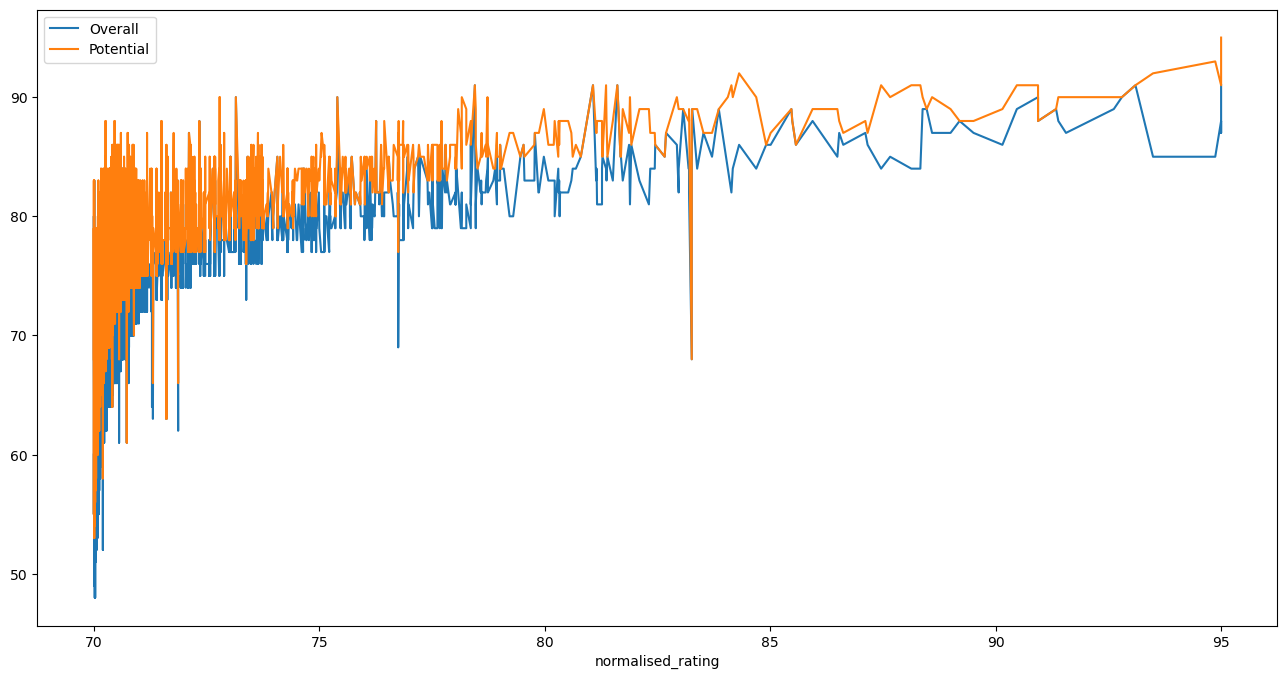

In [195]:
fifa23transfermarkt2022WC = fifa23transfermarkt2022WC.sort_values(by="normalised_rating", ascending=False)

# Plot the normalised_rating for each player
fifa23transfermarkt2022WC.plot(x="normalised_rating",y=['Overall','Potential'], kind="line")
plt.gcf().set_size_inches(16, 8)
# Show the plot
plt.show()

In [22]:
fifa23transfermarkt2022WC.head(10)

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,National Team Image Link,National Team Position,National Team Jersey Number,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties,normalised_rating
4,K. Mbappé,Kylian Mbappe,91,95,190500000,Attack,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,...,https://cdn.sofifa.net/flags/fr.png,ST,10,93,85,97,87,76,80,95.00
36,F. de Jong,Frenkie de Jong,87,92,116500000,Midfield,Netherlands,https://cdn.sofifa.net/players/228/702/23_60.png,25,180,...,https://cdn.sofifa.net/flags/nl.png,CDM,21,72,91,83,89,74,53,95.00
18,Rúben Dias,Ruben Santos Gato Alves Dias,88,91,107500000,Defender,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,187,...,https://cdn.sofifa.net/flags/pt.png,CB,4,29,82,67,83,89,45,95.00
69,Pedri,Pedro Gonzalez Lopez,85,93,116000000,Midfield,Spain,https://cdn.sofifa.net/players/251/854/23_60.png,19,174,...,https://cdn.sofifa.net/flags/es.png,CM,10,68,87,76,88,70,53,94.87
70,P. Foden,Phil Foden,85,92,109500000,Midfield,England,https://cdn.sofifa.net/players/237/692/23_60.png,22,171,...,https://cdn.sofifa.net/flags/gb-eng.png,RW,20,79,85,78,83,47,64,93.49
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,Midfield,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,...,https://cdn.sofifa.net/flags/be.png,RF,7,85,93,73,88,74,83,93.10
8,V. van Dijk,Virgil van Dijk,90,90,98000000,Defender,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,193,...,https://cdn.sofifa.net/flags/nl.png,CB,4,52,79,91,74,93,62,92.80
15,J. Kimmich,Joshua Kimmich,89,90,105500000,Midfield,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,177,...,https://cdn.sofifa.net/flags/de.png,CDM,6,68,87,60,94,68,44,92.62
33,T. Alexander-Arnold,Trent Alexander-Arnold,87,90,100500000,Midfield,England,https://cdn.sofifa.net/players/231/281/23_60.png,23,180,...,https://cdn.sofifa.net/flags/gb-eng.png,-,-,62,87,76,89,66,55,91.56
21,Marquinhos,Marcos Aoas Correa,88,90,92000000,Defender,Brazil,https://cdn.sofifa.net/players/207/865/23_60.png,28,183,...,https://cdn.sofifa.net/flags/br.png,-,-,59,84,81,82,78,52,91.39


Add this value back in using playerid

# Preparing custom function for teams to play against eachother

#### Splitting every country into their own DataFrame

In [196]:
## Removing Spaces From Country Names
fifa23transfermarkt2022WC["Clean Nationality"]= fifa23transfermarkt2022WC["Nationality"].str.replace(r"\s+", "",regex=True)

In [197]:
unique_countries = fifa23transfermarkt2022WC['Clean Nationality'].unique()
unique_positions = fifa23transfermarkt2022WC['Position'].unique()

In [198]:
print(unique_countries)
print(unique_positions)

['France' 'Netherlands' 'Portugal' 'Spain' 'England' 'Belgium' 'Germany'
 'Brazil' 'Senegal' 'Serbia' 'Argentina' 'Uruguay' 'KoreaRepublic'
 'Canada' 'Croatia' 'Morocco' 'Poland' 'UnitedStates' 'Switzerland'
 'Denmark' 'Cameroon' 'Ghana' 'Mexico' 'Ecuador' 'Japan' 'Tunisia' 'Wales'
 'Iran' 'CostaRica' 'Australia' 'SaudiArabia' 'Qatar']
['Attack' 'Midfield' 'Defender']


In [199]:
# creating a dicttionary of each team split into seperate dataframes
WorldCupTeams = {}


# Split the DataFrame into multiple DataFrames based on the unique values

for value1 in unique_countries:
  for value2 in unique_positions:
    value_df = fifa23transfermarkt2022WC[(fifa23transfermarkt2022WC['Clean Nationality'] == value1) & (fifa23transfermarkt2022WC['Position'] == value2)]
    ## 28 Man Squad
    value_df = value_df.sort_values('normalised_rating', ascending=False).head(9)
    WorldCupTeams[(value1, value2)] = value_df

#sets a dataframe for each variation of country and each position

for key, value in WorldCupTeams.items():
  # Create a DataFrame with the same name as the key
  globals()["_".join(key)] = pd.DataFrame(value)

In [200]:
def play_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["normalised_rating"].mean() > team2_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["normalised_rating"].mean() - team2_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["normalised_rating"].mean() > team1_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["normalised_rating"].mean() - team1_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["normalised_rating"].mean() > team1_mid_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["normalised_rating"].mean() - team1_mid_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their normalised_rating goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] += 1
    team1_mid_rating["normalised_rating"] += 1
    team1_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] -= 1
    team2_mid_rating["normalised_rating"] -= 1
    team2_att_rating["normalised_rating"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] += 1
    team2_mid_rating["normalised_rating"] += 1
    team2_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] -= 1
    team1_mid_rating["normalised_rating"] -= 1
    team1_att_rating["normalised_rating"] -= 1
    return "Team 2 wins!"
  else:
    return "It's a draw!"

# Group Stages

## Group A
### Qatar, Ecuador, Senegal, The Netherlands

In [201]:
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Senegal_Defender,Senegal_Midfield,Senegal_Attack))
print(play_game(Qatar_Defender,Qatar_Midfield,Qatar_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack))
print(play_game(Senegal_Defender,Senegal_Midfield,Senegal_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack))
print(play_game(Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack)) 
print('All games played')

It's a draw!
Team 2 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
Team 1 wins!
All games played


## Group B
### England, Iran, USA, Wales

In [202]:
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,England_Defender,England_Midfield,England_Attack))
print(play_game(Iran_Defender,Iran_Midfield,Iran_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(England_Defender,England_Midfield,England_Attack,Wales_Defender,Wales_Midfield,Wales_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Wales_Defender,Wales_Midfield,Wales_Attack)) 
print('All games played')

It's a draw!
Team 2 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!
It's a draw!
All games played


## Group C
### Argentina, Saudi Arabia, Mexico, Poland

In [203]:
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack))
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,Mexico_Defender,Mexico_Midfield,Mexico_Attack))
print(play_game(SaudiArabia_Defender,SaudiArabia_Midfield,SaudiArabia_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(Mexico_Defender,Mexico_Midfield,Mexico_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack))
print(play_game(Mexico_Defender,Mexico_Midfield,Mexico_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack))
print(play_game(UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack,Argentina_Defender,Argentina_Midfield,Argentina_Attack)) 
print('All games played')

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
All games played


## Group D
### France, Austrialia, Denmark, Tunisa

In [204]:
print(play_game(France_Defender,France_Midfield,France_Attack,Australia_Defender,Australia_Midfield,Australia_Attack))
print(play_game(France_Defender,France_Midfield,France_Attack,Denmark_Defender,Denmark_Midfield,Denmark_Attack))
print(play_game(France_Defender,France_Midfield,France_Attack,Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack))
print(play_game(Denmark_Defender,Denmark_Midfield,Denmark_Attack,Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack))
print(play_game(Denmark_Defender,Denmark_Midfield,Denmark_Attack,Australia_Defender,Australia_Midfield,Australia_Attack))
print(play_game(Tunisia_Defender,Tunisia_Midfield,Tunisia_Attack,Australia_Defender,Australia_Midfield,Australia_Attack)) 
print('All games played')

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
It's a draw!
Team 2 wins!
All games played


## Group E
### Spain, Costa Rica, Germany, Japan

In [205]:
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack)) 
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,Japan_Defender,Japan_Midfield,Japan_Attack)) 
print(play_game(Spain_Defender,Spain_Midfield,Spain_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 
print(play_game(Japan_Defender,Japan_Midfield,Japan_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 
print(play_game(Japan_Defender,Japan_Midfield,Japan_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack)) 
print(play_game(Germany_Defender,Germany_Midfield,Germany_Attack,CostaRica_Defender,CostaRica_Midfield,CostaRica_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
It's a draw!
Team 2 wins!
It's a draw!
Team 1 wins!
All games played


## Group F
### Belgium, Canada, Morocco, Croatia

In [206]:
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack)) 
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Croatia_Defender,Croatia_Midfield,Croatia_Attack)) 
print(play_game(Canada_Defender,Canada_Midfield,Canada_Attack,Belgium_Defender,Belgium_Midfield,Belgium_Attack)) 
print(play_game(Croatia_Defender,Croatia_Midfield,Croatia_Attack,Belgium_Defender,Belgium_Midfield,Belgium_Attack)) 
print(play_game(Croatia_Defender,Croatia_Midfield,Croatia_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack)) 
print(play_game(Belgium_Defender,Belgium_Midfield,Belgium_Attack,Morocco_Defender,Morocco_Midfield,Morocco_Attack))  
print('All games played') 

Team 2 wins!
Team 2 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
It's a draw!
All games played


## Group G
### Brazil, Serbia, Switzerland, Cameroon

In [207]:
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack)) 
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack)) 
print(play_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack)) 
print(play_game(Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack)) 
print(play_game(Switzerland_Defender,Switzerland_Midfield,Switzerland_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack)) 
print(play_game(Serbia_Defender,Serbia_Midfield,Serbia_Attack,Cameroon_Defender,Cameroon_Midfield,Cameroon_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
It's a draw!
Team 1 wins!
All games played


## Group H
### Portugal, Ghana, Uruguay, Korea Republic

In [208]:
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack)) 
print(play_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 
print(play_game(KoreaRepublic_Defender,KoreaRepublic_Midfield,KoreaRepublic_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack)) 
print(play_game(Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack,Ghana_Defender,Ghana_Midfield,Ghana_Attack))  
print('All games played') 

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
Team 2 wins!
It's a draw!
All games played


## Final Results Group Results
### Note as np.random is used in the play_game function sometimes results will differ.

#### Group A
Netherlands 
Ecuador 
 
#### Group B
England 
Usa 
 
#### Group C
Argentina 
Mexico 

#### Group D
France 
Australia 

#### Group E
Spain 
Germany 
 
#### Group F
Belgium 
Croatia 
 
#### Group G
Brazil 
Serbia 
 
#### Group H
Portugal 
Uruguay 

# Round of 16 (First plays second in next group (ie: 1st in A against 2nd in B) and so on)
#### Netherlands vs USA
#### England vs Ecuador
#### Argentina vs Australia
#### France vs Mexico
#### Spain vs Croatia
#### Belgium vs Germany
#### Brazil vs Uruguay
#### Portugal vs Serbia

In [209]:
#creating a seperate knockout match function , with this there has to be a winner
def play_knockout_game(team1_def_rating,team1_mid_rating,team1_att_rating,team2_def_rating,team2_mid_rating,team2_att_rating):


  team1_rounds = 0
  team2_rounds = 0

  # Check if team 1's attack is greater than team 2's defense
  if (team1_att_rating["normalised_rating"].mean() > team2_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team1_att_rating["normalised_rating"].mean() - team2_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team1_rounds += 1

    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
    
  # Check if team 2's attack is greater than team 1's defense
  if (team2_att_rating["normalised_rating"].mean() > team1_def_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_att_rating["normalised_rating"].mean() - team1_def_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 1 wins a round
    if rand < probability:
      team2_rounds += 1
    
 

   # Check if team 2's midfield is greater than team 1's midfield
  if (team2_mid_rating["normalised_rating"].mean() > team1_mid_rating["normalised_rating"].mean()):
    # Calculate the difference in ratings
    rating_diff = team2_mid_rating["normalised_rating"].mean() - team1_mid_rating["normalised_rating"].mean()
    # Calculate the probability of a normal distribution with a mean equal to the difference in ratings
    # and a standard deviation of 1
    probability = norm.cdf(rating_diff, 1)
    # Generate a random number between 0 and 1
    rand = random.random()
    # If the random number is less than the probability of winning, team 2 wins a round
    if rand < probability:
      team2_rounds += 1
    
    
    #print(round(team1_att_rating["normalised_rating"].mean(),2) , "Team1 Attack") 
    #print(round(team1_mid_rating["normalised_rating"].mean(),2) , "Team1 Midfield")
    #print(round(team1_def_rating["normalised_rating"].mean(),2) , "Team1 Defending")
    #print(round(team2_def_rating["normalised_rating"].mean(),2) , "Team2 Defending")
    #print(round(team2_mid_rating["normalised_rating"].mean(),2) , "Team2 Midfield") 
    #print(round(team2_att_rating["normalised_rating"].mean(),2) , "Team2 Attacking") 
   
    

  if team1_rounds > team2_rounds:
    #Adding Form to a team, if they win their normalised_rating goes up by 1, down 1 for a loss and the same for a draw
    
    # Add 2 to the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] += 1
    team1_mid_rating["normalised_rating"] += 1
    team1_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] -= 1
    team2_mid_rating["normalised_rating"] -= 1
    team2_att_rating["normalised_rating"] -= 1
    return "Team 1 wins!"
  elif team1_rounds < team2_rounds:
    
    # Add 2 to the normalised_rating of every player in team 2
    team2_def_rating["normalised_rating"] += 1
    team2_mid_rating["normalised_rating"] += 1
    team2_att_rating["normalised_rating"] += 1
    
    # Subtract 1 from the normalised_rating of every player in team 1
    team1_def_rating["normalised_rating"] -= 1
    team1_mid_rating["normalised_rating"] -= 1
    team1_att_rating["normalised_rating"] -= 1
    return "Team 2 wins!"
  else:
    return random.choice(["Tean 1", "Team 2"]) +" won in penalties!"

In [210]:
print(play_knockout_game(Netherlands_Defender,Netherlands_Midfield,Netherlands_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Ecuador_Defender,Ecuador_Midfield,Ecuador_Attack)) 

print(play_knockout_game(Argentina_Defender,Argentina_Midfield,Argentina_Attack,Australia_Defender,Australia_Midfield,Australia_Attack)) 

print(play_knockout_game(France_Defender,France_Midfield,France_Attack,Mexico_Defender,Mexico_Midfield,Mexico_Attack)) 

print(play_knockout_game(Spain_Defender,Spain_Midfield,Spain_Attack,Croatia_Defender,Croatia_Midfield,Croatia_Attack)) 

print(play_knockout_game(Belgium_Defender,Belgium_Midfield,Belgium_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 

print(play_knockout_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Uruguay_Defender,Uruguay_Midfield,Uruguay_Attack)) 

print(play_knockout_game(Portugal_Defender,Portugal_Midfield,Portugal_Attack,Serbia_Defender,Serbia_Midfield,Serbia_Attack))  

Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 1 wins!
Team 2 wins!
Team 1 wins!
Team 1 wins!


# Quarter Finals
#### Spain vs USA
#### England vs France
#### Argentina vs Germany
#### Brazil vs Portugal

In [211]:
print(play_knockout_game(Spain_Defender,Spain_Midfield,Spain_Attack,UnitedStates_Defender,UnitedStates_Midfield,UnitedStates_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,France_Defender,France_Midfield,France_Attack)) 

print(play_knockout_game(Argentina_Defender,Argentina_Midfield,Argentina_Attack,Germany_Defender,Germany_Midfield,Germany_Attack)) 

print(play_knockout_game(Brazil_Defender,Brazil_Midfield,Brazil_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 
 

Team 1 wins!
Tean 1 won in penalties!
Team 2 wins!
Team 2 won in penalties!


# Semi Finals
#### Spain vs England
#### Germany vs Portugal

In [213]:
print(play_knockout_game(Germany_Defender,Germany_Midfield,Germany_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 

print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Spain_Defender,Spain_Midfield,Spain_Attack)) 


Tean 1 won in penalties!
Team 2 won in penalties!


# World Cup Final
#### England vs Portugal

In [214]:
print(play_knockout_game(England_Defender,England_Midfield,England_Attack,Portugal_Defender,Portugal_Midfield,Portugal_Attack)) 

Tean 1 won in penalties!


# World Cup Winners: **Portugal**

In [217]:
Portugal_XI= pd.concat([Portugal_Defender.head(4), Portugal_Midfield.head(4), Portugal_Attack.head(3)], ignore_index=True, sort=False)

In [218]:
Portugal_XI

,Known As,Full Name,Overall,Potential,Value(in Euro),Position,Nationality,Image Link,Age,Height(in cm),...,Finishing,Short Passing,Sprint Speed,Stamina,Strength,Penalties,rank,country_full,normalised_rating,Clean Nationality
0,Rúben Dias,Ruben Santos Gato Alves Dias,88,91,107500000,Defender,Portugal,https://cdn.sofifa.net/players/239/818/23_60.png,25,187,...,29,82,67,83,89,45,9,Portugal,99.00,Portugal
1,João Cancelo,Joao Pedro Cavaco Cancelo,88,88,82500000,Defender,Portugal,https://cdn.sofifa.net/players/210/514/23_60.png,28,182,...,69,88,84,91,62,52,9,Portugal,93.20,Portugal
2,Nuno Mendes,Nuno Alexandre Tavares Mendes,80,88,44000000,Defender,Portugal,https://cdn.sofifa.net/players/252/145/23_60.png,20,176,...,45,77,89,80,69,45,9,Portugal,84.22,Portugal
3,Gonçalo Inácio,Goncalo Bernardo Inacio,79,88,36000000,Defender,Portugal,https://cdn.sofifa.net/players/257/179/23_60.png,20,185,...,23,78,81,76,78,40,9,Portugal,82.36,Portugal
4,Bernardo Silva,Bernardo Mota Carvalho e Silva,88,88,97500000,Midfield,Portugal,https://cdn.sofifa.net/players/218/667/23_60.png,27,173,...,79,89,71,93,54,68,9,Portugal,94.94,Portugal
5,Bruno Fernandes,Bruno Miguel Borges Fernandes,86,86,72500000,Midfield,Portugal,https://cdn.sofifa.net/players/212/198/23_60.png,27,179,...,83,88,69,92,66,90,9,Portugal,89.57,Portugal
6,João Félix,Joao Felix Sequeira,84,90,68500000,Midfield,Portugal,https://cdn.sofifa.net/players/242/444/23_60.png,22,181,...,79,83,83,75,62,68,9,Portugal,88.69,Portugal
7,Rúben Neves,Ruben Diogo da Silva Neves,83,86,47500000,Midfield,Portugal,https://cdn.sofifa.net/players/224/293/23_60.png,25,180,...,65,88,54,79,67,76,9,Portugal,84.20,Portugal
8,Diogo Jota,Diogo Jose Teixeira da Silva,85,89,76000000,Attack,Portugal,https://cdn.sofifa.net/players/224/458/23_60.png,25,178,...,86,77,82,83,71,69,9,Portugal,83.98,Portugal
9,Rafael Leão,Rafael da Conceicao Leao,84,90,66500000,Attack,Portugal,https://cdn.sofifa.net/players/241/721/23_60.png,23,188,...,80,76,92,77,80,63,9,Portugal,82.73,Portugal


# Data Analysis

In [222]:
fifa23transfermarkt2022WC.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Position', 'Nationality', 'Image Link', 'Age', 'Height(in cm)',
       'TotalStats', 'Club Name', 'Wage(in Euro)', 'Release Clause',
       'Club Position', 'Club Jersey Number', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Finishing', 'Short Passing',
       'Sprint Speed', 'Stamina', 'Strength', 'Penalties', 'rank',
       'country_full', 'normalised_rating', 'Clean Nationality'],
      dtype='object')

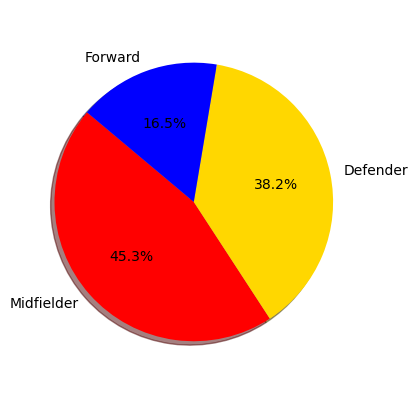

In [298]:
plt.figure(figsize=(4,5))

labels = 'Midfielder', 'Defender', 'Forward'
colors = ['r', 'gold','blue', 'green']

plt.pie(fifa23transfermarkt2022WC["Position"].value_counts(), labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

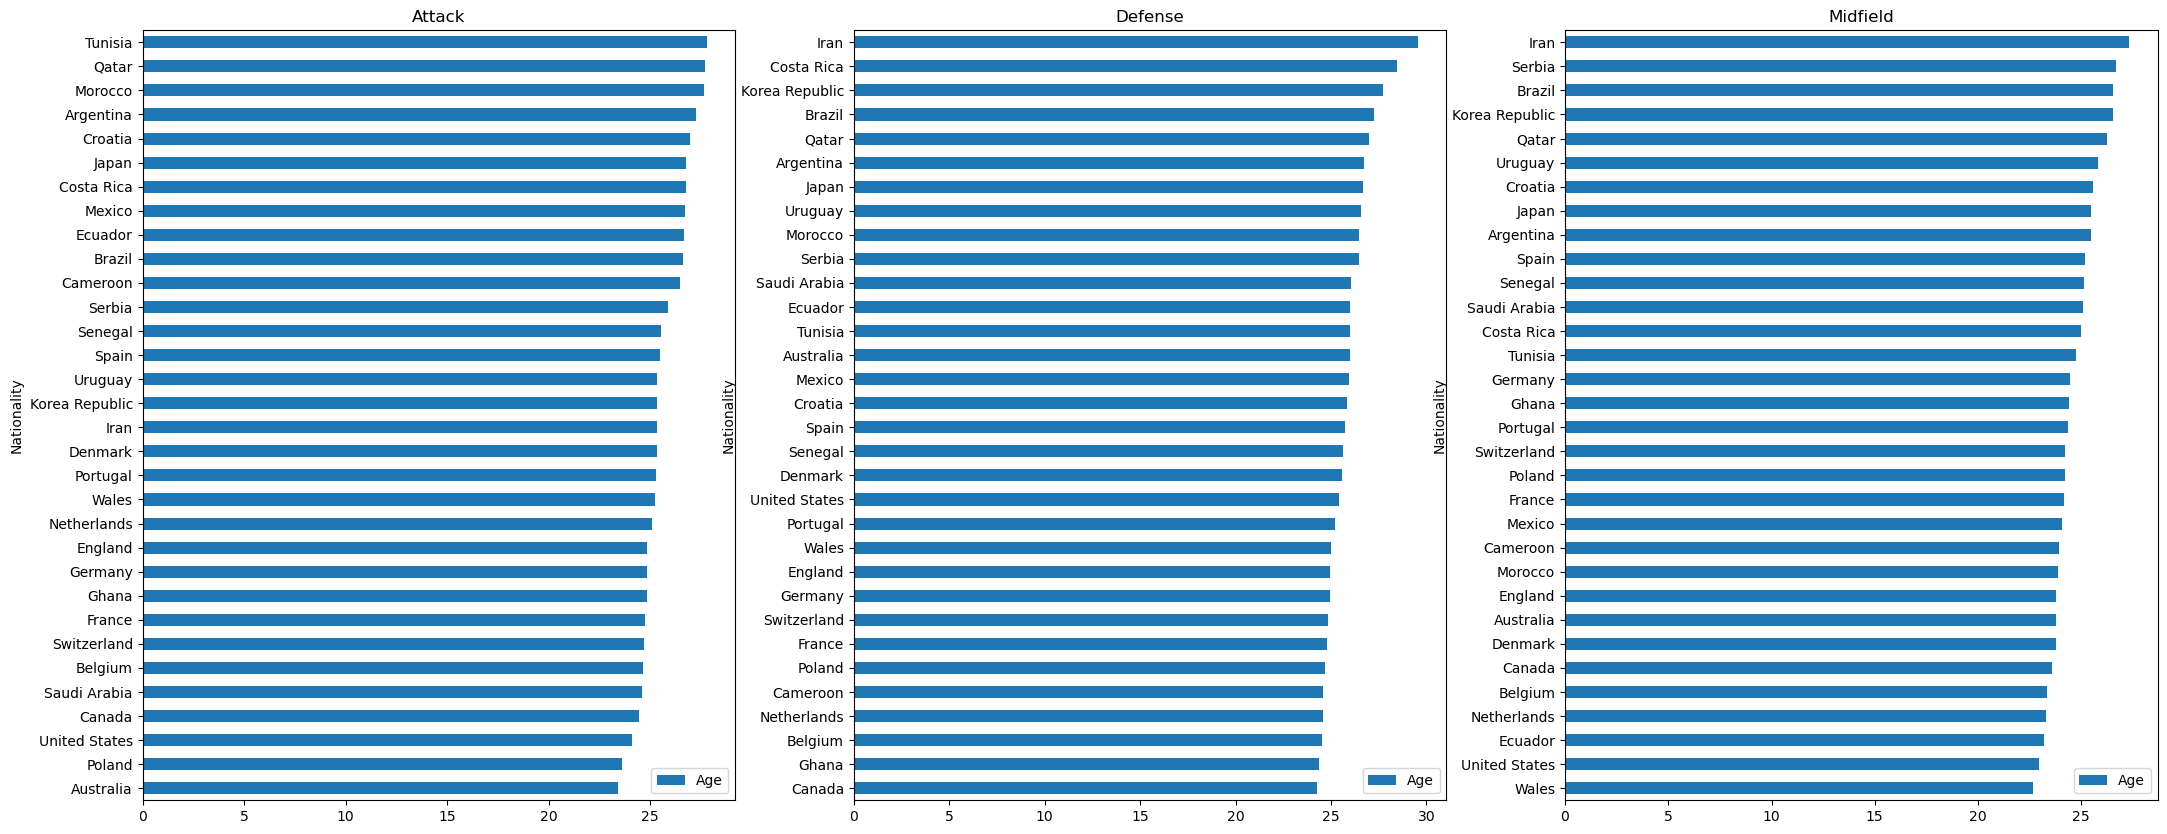

In [335]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

attack_avg_age_by_country = Attack.groupby(['Nationality'], as_index=False)['Age'].mean().sort_values('Age',ascending=True)
defense_avg_age_by_country = Defender.groupby(['Nationality'], as_index=False)['Age'].mean().sort_values('Age',ascending=True)
midfield_avg_age_by_country = Midfield.groupby(['Nationality'], as_index=False)['Age'].mean().sort_values('Age',ascending=True)
attack_avg_age_by_country = attack_avg_age_by_country.set_index('Nationality')
midfield_avg_age_by_country = midfield_avg_age_by_country.set_index('Nationality')
defense_avg_age_by_country = defense_avg_age_by_country.set_index('Nationality')



attack_avg_age_by_country.plot(kind='barh', title='Attack', ax=ax1)
midfield_avg_age_by_country.plot(kind='barh', title='Midfield', ax=ax3)
defense_avg_age_by_country.plot(kind='barh', title='Defense', ax=ax2)

plt.gcf().set_size_inches(26, 10)
plt.show()

In [227]:
playerstats = ['Age','Skill Moves','Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength', 'Penalties']

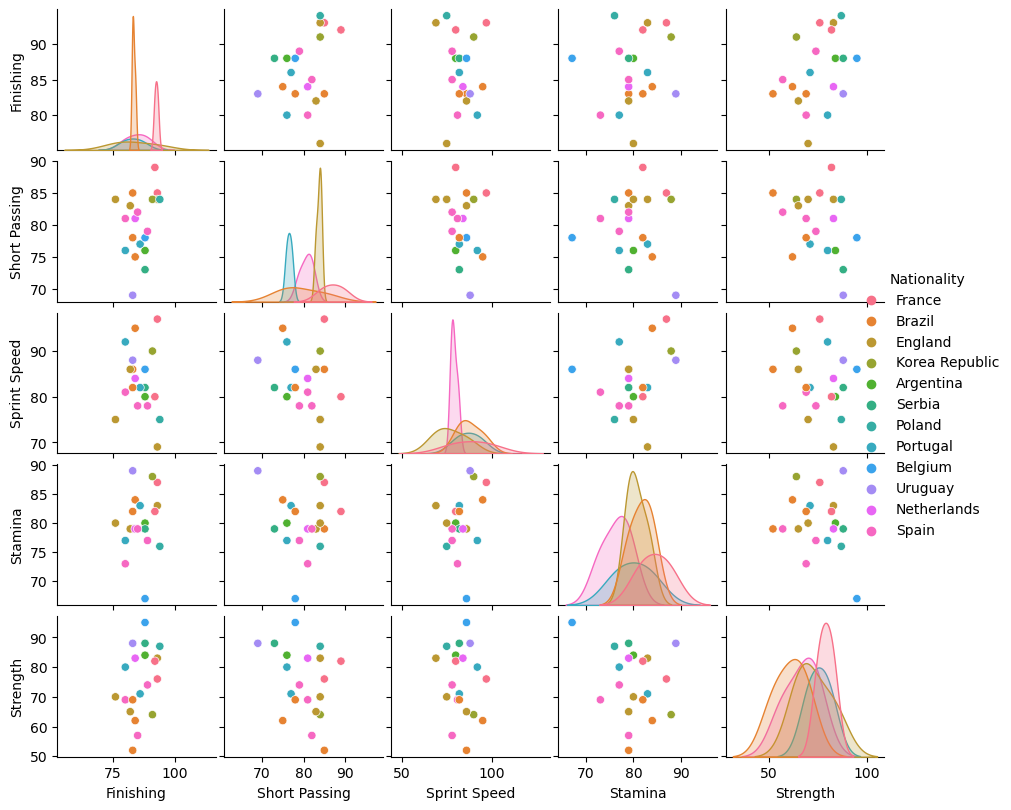

In [337]:
playerstats = ['Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength','Nationality']
Top50Attack= Attack.sort_values(by="normalised_rating", ascending=False).head(20)

sns.pairplot(Top50Attack[playerstats],hue='Nationality')

plt.gcf().set_size_inches(10, 8)
plt.show()

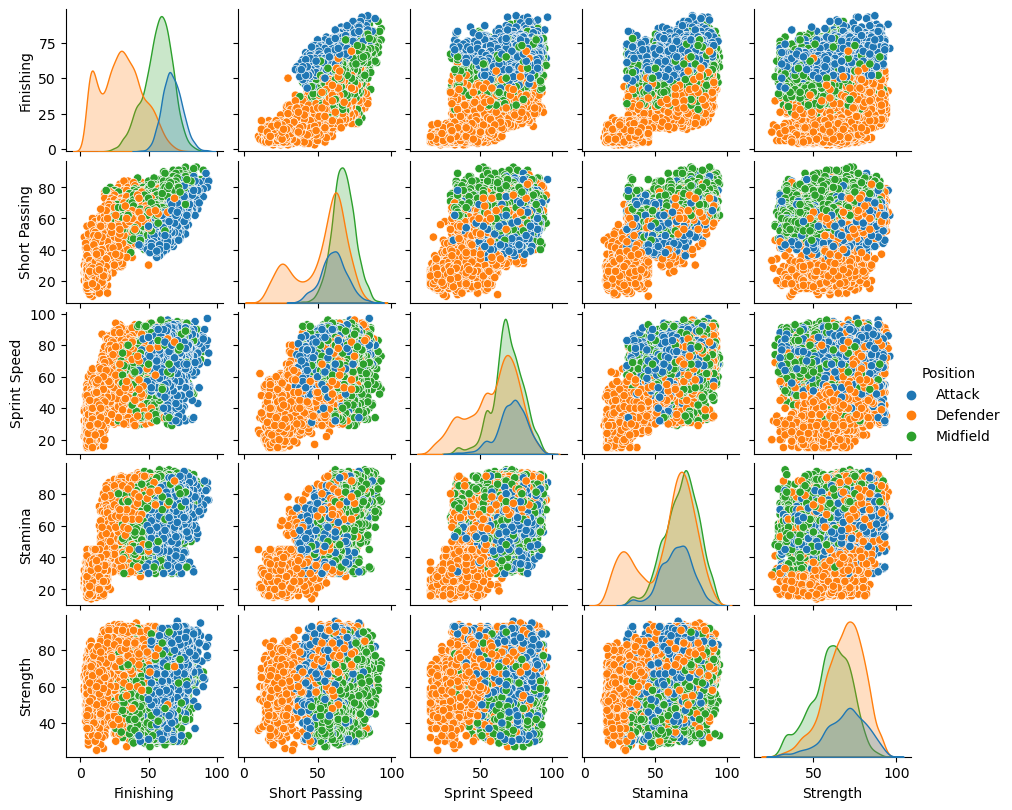

In [288]:
playerstats = ['Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength','Position']


sns.pairplot(fifa23transfermarkt2022WC[playerstats],hue='Position',kind='scatter')
plt.gcf().set_size_inches(10, 8)
plt.show()

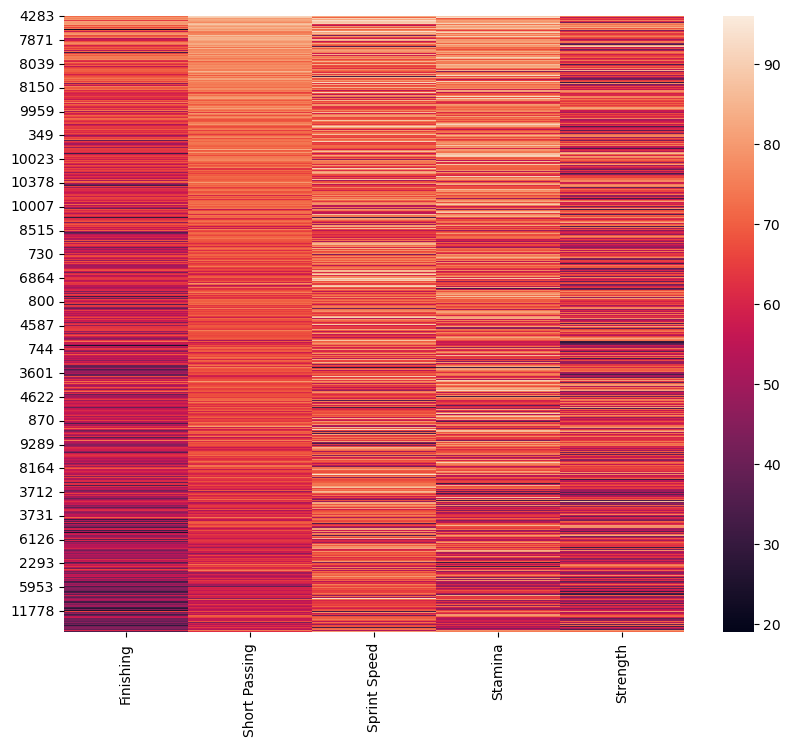

In [383]:
playerstats = ['Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength']


sns.heatmap(Midfield[playerstats])
plt.gcf().set_size_inches(10, 8)
plt.show()

In [340]:
## Creating an Average Player for Every Country and Position
avg_values_by_country_and_position = fifa23transfermarkt2022WC.groupby(['Nationality','Position'], as_index=False)[['Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength','Position']].mean()

In [341]:
avg_values_by_country_and_position

,Nationality,Position,Finishing,Short Passing,Sprint Speed,Stamina,Strength
0,Argentina,Attack,69.948276,63.540230,69.195402,65.770115,70.637931
1,Argentina,Defender,31.775194,54.555556,59.266150,61.397933,68.935401
2,Argentina,Midfield,58.227154,69.710183,69.971279,69.287206,60.488251
3,Australia,Attack,60.000000,51.281250,72.562500,63.937500,68.468750
4,Australia,Defender,27.111111,49.190476,54.071429,59.960317,70.214286
...,...,...,...,...,...,...,...
91,Uruguay,Defender,31.609023,50.947368,56.428571,56.541353,67.421053
92,Uruguay,Midfield,59.373737,69.020202,69.151515,70.727273,59.626263
93,Wales,Attack,64.840000,59.240000,72.880000,66.680000,65.280000
94,Wales,Defender,29.439024,49.207317,55.926829,56.000000,65.817073


In [ ]:
playerstats = ['Finishing', 'Short Passing','Sprint Speed', 'Stamina', 'Strength']

sns.heatmap(avg_values_by_country_and_position[playerstats],annot=True)
plt.gcf().set_size_inches(10, 8)
plt.show()

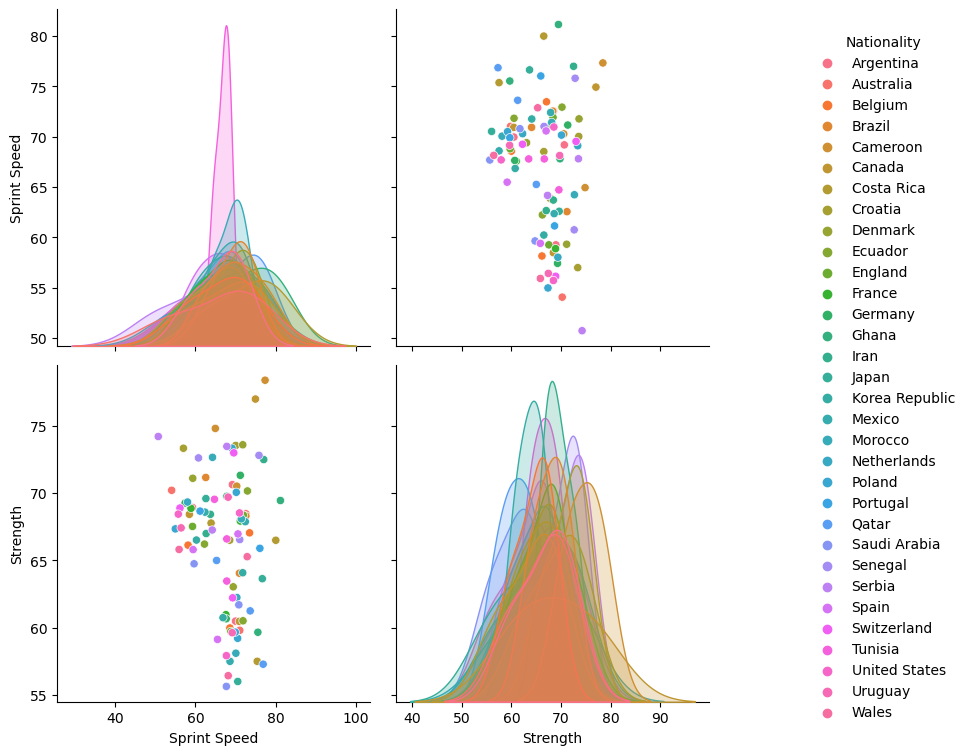

In [343]:
playerstats = ['Sprint Speed','Strength','Position','Nationality']


sns.pairplot(avg_values_by_country_and_position[playerstats],hue='Nationality',kind='scatter')
plt.gcf().set_size_inches(10, 8)
plt.show()

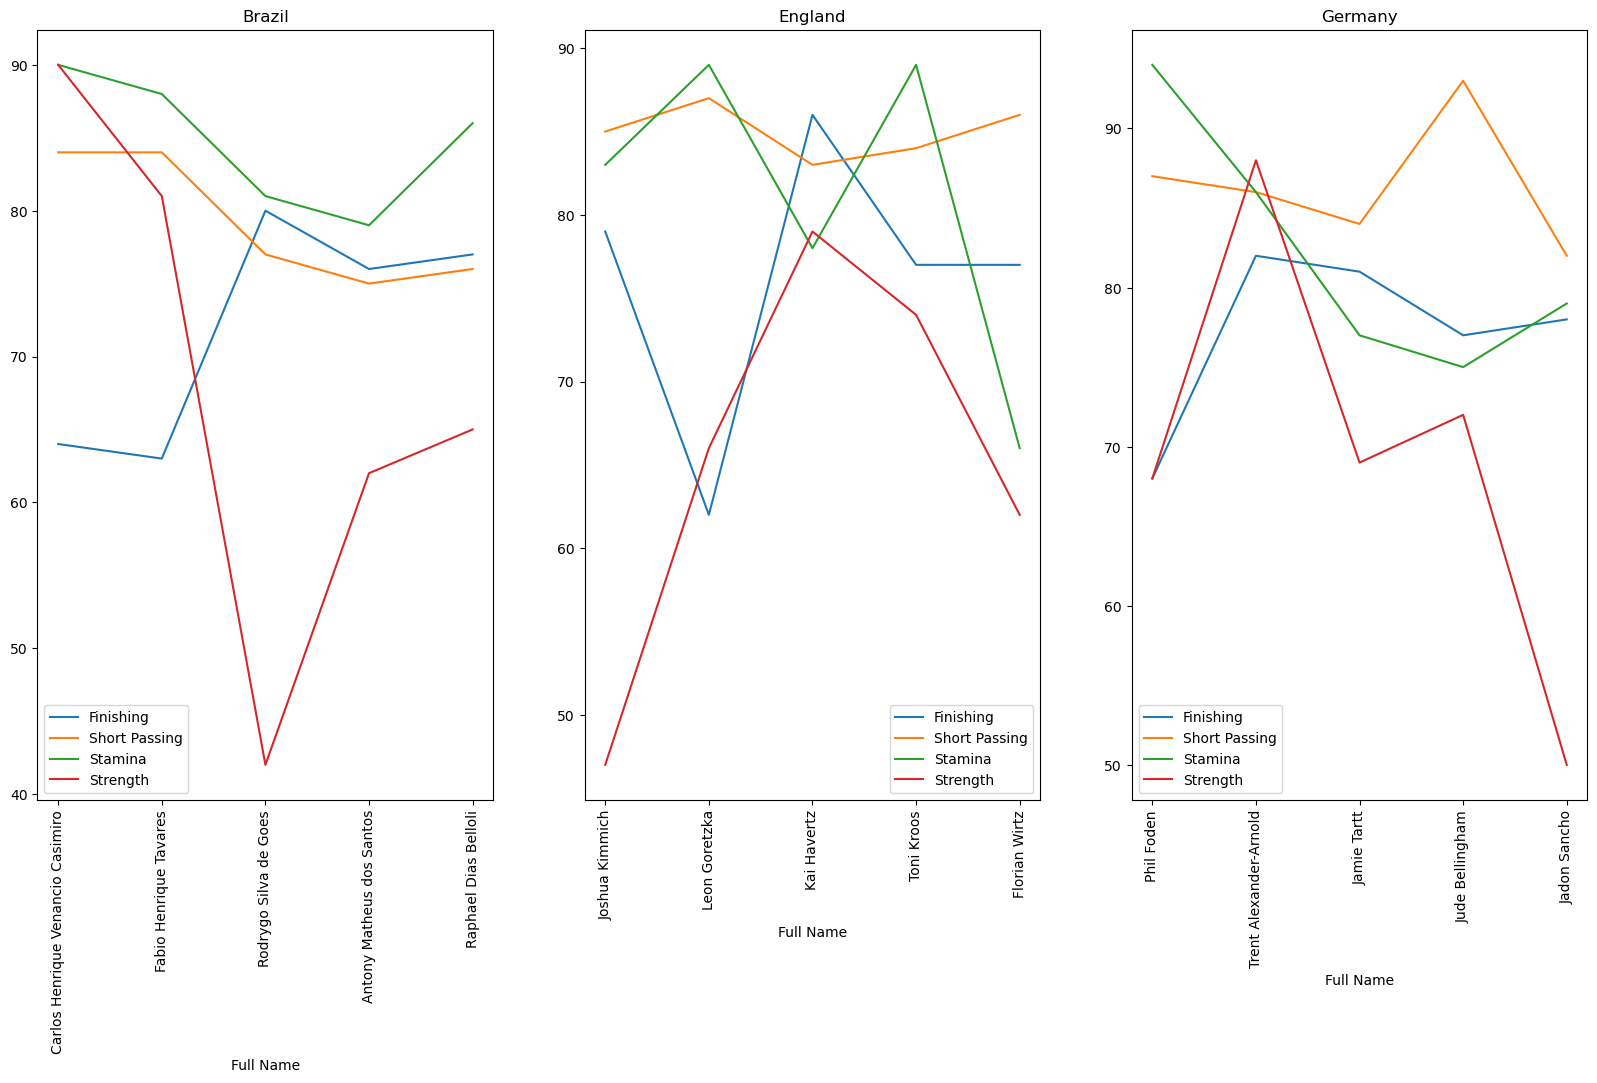

In [378]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

Brazil_Attack = Brazil_Attack.sort_values(by="normalised_rating", ascending=False)
Germany_Attack = Germany_Attack.sort_values(by="normalised_rating", ascending=False)
England_Attack = England_Attack.sort_values(by="normalised_rating", ascending=False)

names1 = Brazil_Attack['Full Name'].head(5)
names2 = Germany_Attack['Full Name'].head(5)
names3 = England_Attack['Full Name'].head(5)

Brazil_Attack.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='Brazil', ax=ax1)
England_Attack.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='England', ax=ax2)
Germany_Attack.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='Germany', ax=ax3)

ax1.set_xticks(range(len(names1)))
ax1.set_xticklabels(names1, rotation=90)
ax2.set_xticks(range(len(names2)))
ax2.set_xticklabels(names2, rotation=90)
ax3.set_xticks(range(len(names3)))
ax3.set_xticklabels(names3, rotation=90)

plt.gcf().set_size_inches(20, 10)
           
plt.show()

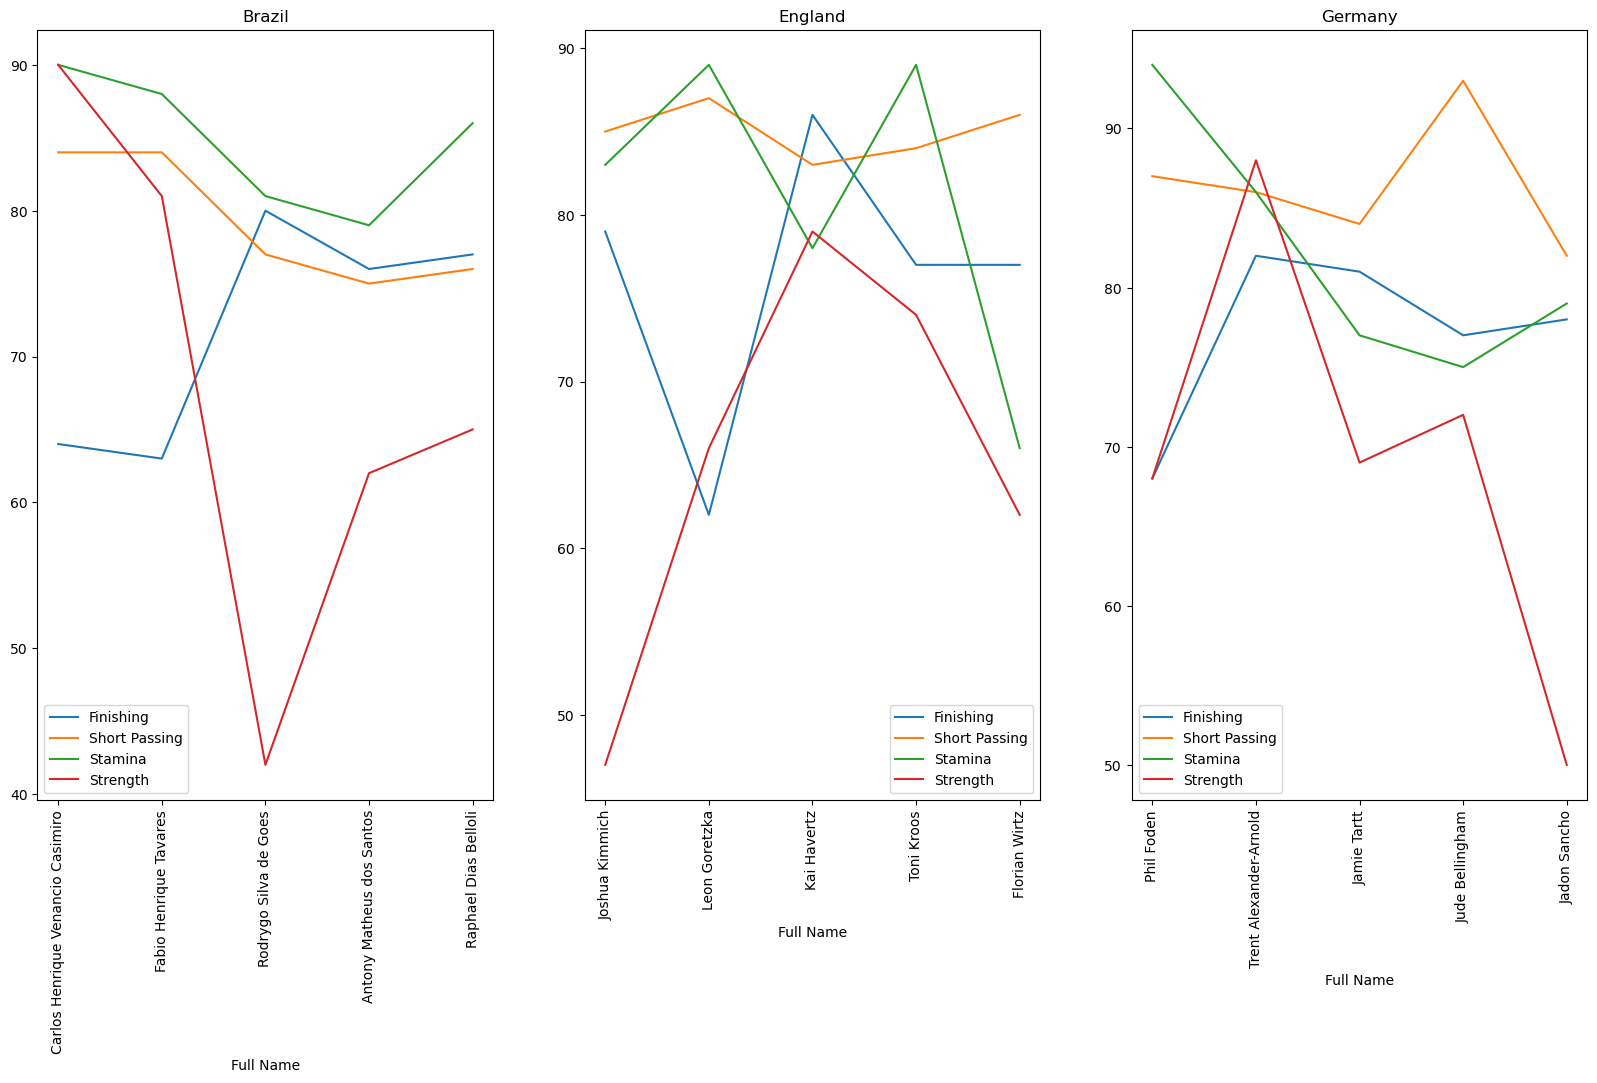

In [377]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

Brazil_Midfield = Brazil_Midfield.sort_values(by="normalised_rating", ascending=False)
Germany_Midfield = Germany_Midfield.sort_values(by="normalised_rating", ascending=False)
England_Midfield = England_Midfield.sort_values(by="normalised_rating", ascending=False)

names1 = Brazil_Midfield['Full Name'].head(5)
names2 = Germany_Midfield['Full Name'].head(5)
names3 = England_Midfield['Full Name'].head(5)

Brazil_Midfield.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='Brazil', ax=ax1)
England_Midfield.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='England', ax=ax2)
Germany_Midfield.head(5).plot(x='Full Name',y=['Finishing','Short Passing','Stamina','Strength'],kind='line', title='Germany', ax=ax3)


ax1.set_xticks(range(len(names1)))
ax1.set_xticklabels(names1, rotation=90)
ax2.set_xticks(range(len(names2)))
ax2.set_xticklabels(names2, rotation=90)
ax3.set_xticks(range(len(names3)))
ax3.set_xticklabels(names3, rotation=90)

plt.gcf().set_size_inches(20, 10)
           
plt.show()